# Energy Data Science - Homework #2
Kacper Aleksander 244693EV

Tallinn University of Technology

11th of December, 2024

## Read and understand the data

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('train.csv')
df.time = pd.to_datetime(df.time, utc=True)
df.set_index('time', inplace=True)
df

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2021-08-31 21:00:00+00:00,11.2,10.3,94.0,NaN,320.0,7.2,16.7,1012.6,0.09016,0.577
2021-08-31 22:00:00+00:00,10.7,9.6,93.0,NaN,320.0,7.2,13.0,1012.6,0.09251,0.594
2021-08-31 23:00:00+00:00,9.9,9.0,94.0,NaN,320.0,7.2,13.0,1012.2,0.08890,0.685
2021-09-01 00:00:00+00:00,10.0,8.4,90.0,NaN,330.0,7.2,13.0,1011.9,0.08735,1.016
2021-09-01 01:00:00+00:00,9.0,8.1,94.0,NaN,300.0,3.6,13.0,1011.4,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...
2022-08-17 16:00:00+00:00,26.1,16.1,54.0,NaN,120.0,7.0,13.0,1015.0,0.75008,0.897
2022-08-17 17:00:00+00:00,24.1,16.1,61.0,NaN,100.0,6.0,14.8,1015.0,0.75005,2.796
2022-08-17 18:00:00+00:00,24.1,16.6,63.0,NaN,90.0,4.0,13.0,1015.5,0.74888,0.733


## Clean the data (fill the missing data, if needed)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8424 entries, 2021-08-31 21:00:00+00:00 to 2022-08-17 20:00:00+00:00
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8424 non-null   float64
 1   dwpt    8424 non-null   float64
 2   rhum    8424 non-null   float64
 3   snow    119 non-null    float64
 4   wdir    8424 non-null   float64
 5   wspd    8424 non-null   float64
 6   wpgt    8424 non-null   float64
 7   pres    8424 non-null   float64
 8   price   8424 non-null   float64
 9   demand  8338 non-null   float64
dtypes: float64(10)
memory usage: 723.9 KB


There are missing data in features snow and demand.

### Snow

In [9]:
arr = df.snow.unique()
arr.sort()
arr

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 200., 210., 220.,
        nan])

In [10]:
df.snow.groupby(pd.Grouper(freq='ME')).count()

time
2021-08-31 00:00:00+00:00     0
2021-09-30 00:00:00+00:00     0
2021-10-31 00:00:00+00:00     0
2021-11-30 00:00:00+00:00     7
2021-12-31 00:00:00+00:00    30
2022-01-31 00:00:00+00:00    31
2022-02-28 00:00:00+00:00    28
2022-03-31 00:00:00+00:00    20
2022-04-30 00:00:00+00:00     3
2022-05-31 00:00:00+00:00     0
2022-06-30 00:00:00+00:00     0
2022-07-31 00:00:00+00:00     0
2022-08-31 00:00:00+00:00     0
Freq: ME, Name: snow, dtype: int64

It looks like snow data is missing in warmer months, which is very logical. It can be assumed that NaN is the same as 0.

In [11]:
df.snow = df.snow.fillna(0)

### Demand

In [12]:
demand = df.demand[df.demand.isnull()]
demand.fillna(1, inplace=True)
demand.groupby(pd.Grouper(freq='ME')).count()

time
2021-09-30 00:00:00+00:00    10
2021-10-31 00:00:00+00:00    11
2021-11-30 00:00:00+00:00    10
2021-12-31 00:00:00+00:00    10
2022-01-31 00:00:00+00:00    11
2022-02-28 00:00:00+00:00     2
2022-03-31 00:00:00+00:00    10
2022-04-30 00:00:00+00:00     5
2022-05-31 00:00:00+00:00     6
2022-06-30 00:00:00+00:00     7
2022-07-31 00:00:00+00:00     2
2022-08-31 00:00:00+00:00     2
Freq: ME, Name: demand, dtype: int64

<Axes: xlabel='time', ylabel='demand'>

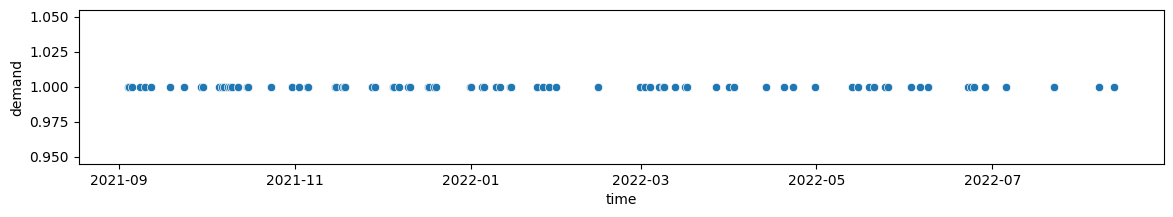

In [13]:
fig, ax = plt.subplots(figsize=(14, 2))

sns.scatterplot(demand)

It can be assumed that demand data is missing completely at random (MCAR). It can be left as it is.

## Provide a description of the data, including statistics and at least two visuals to gain insights

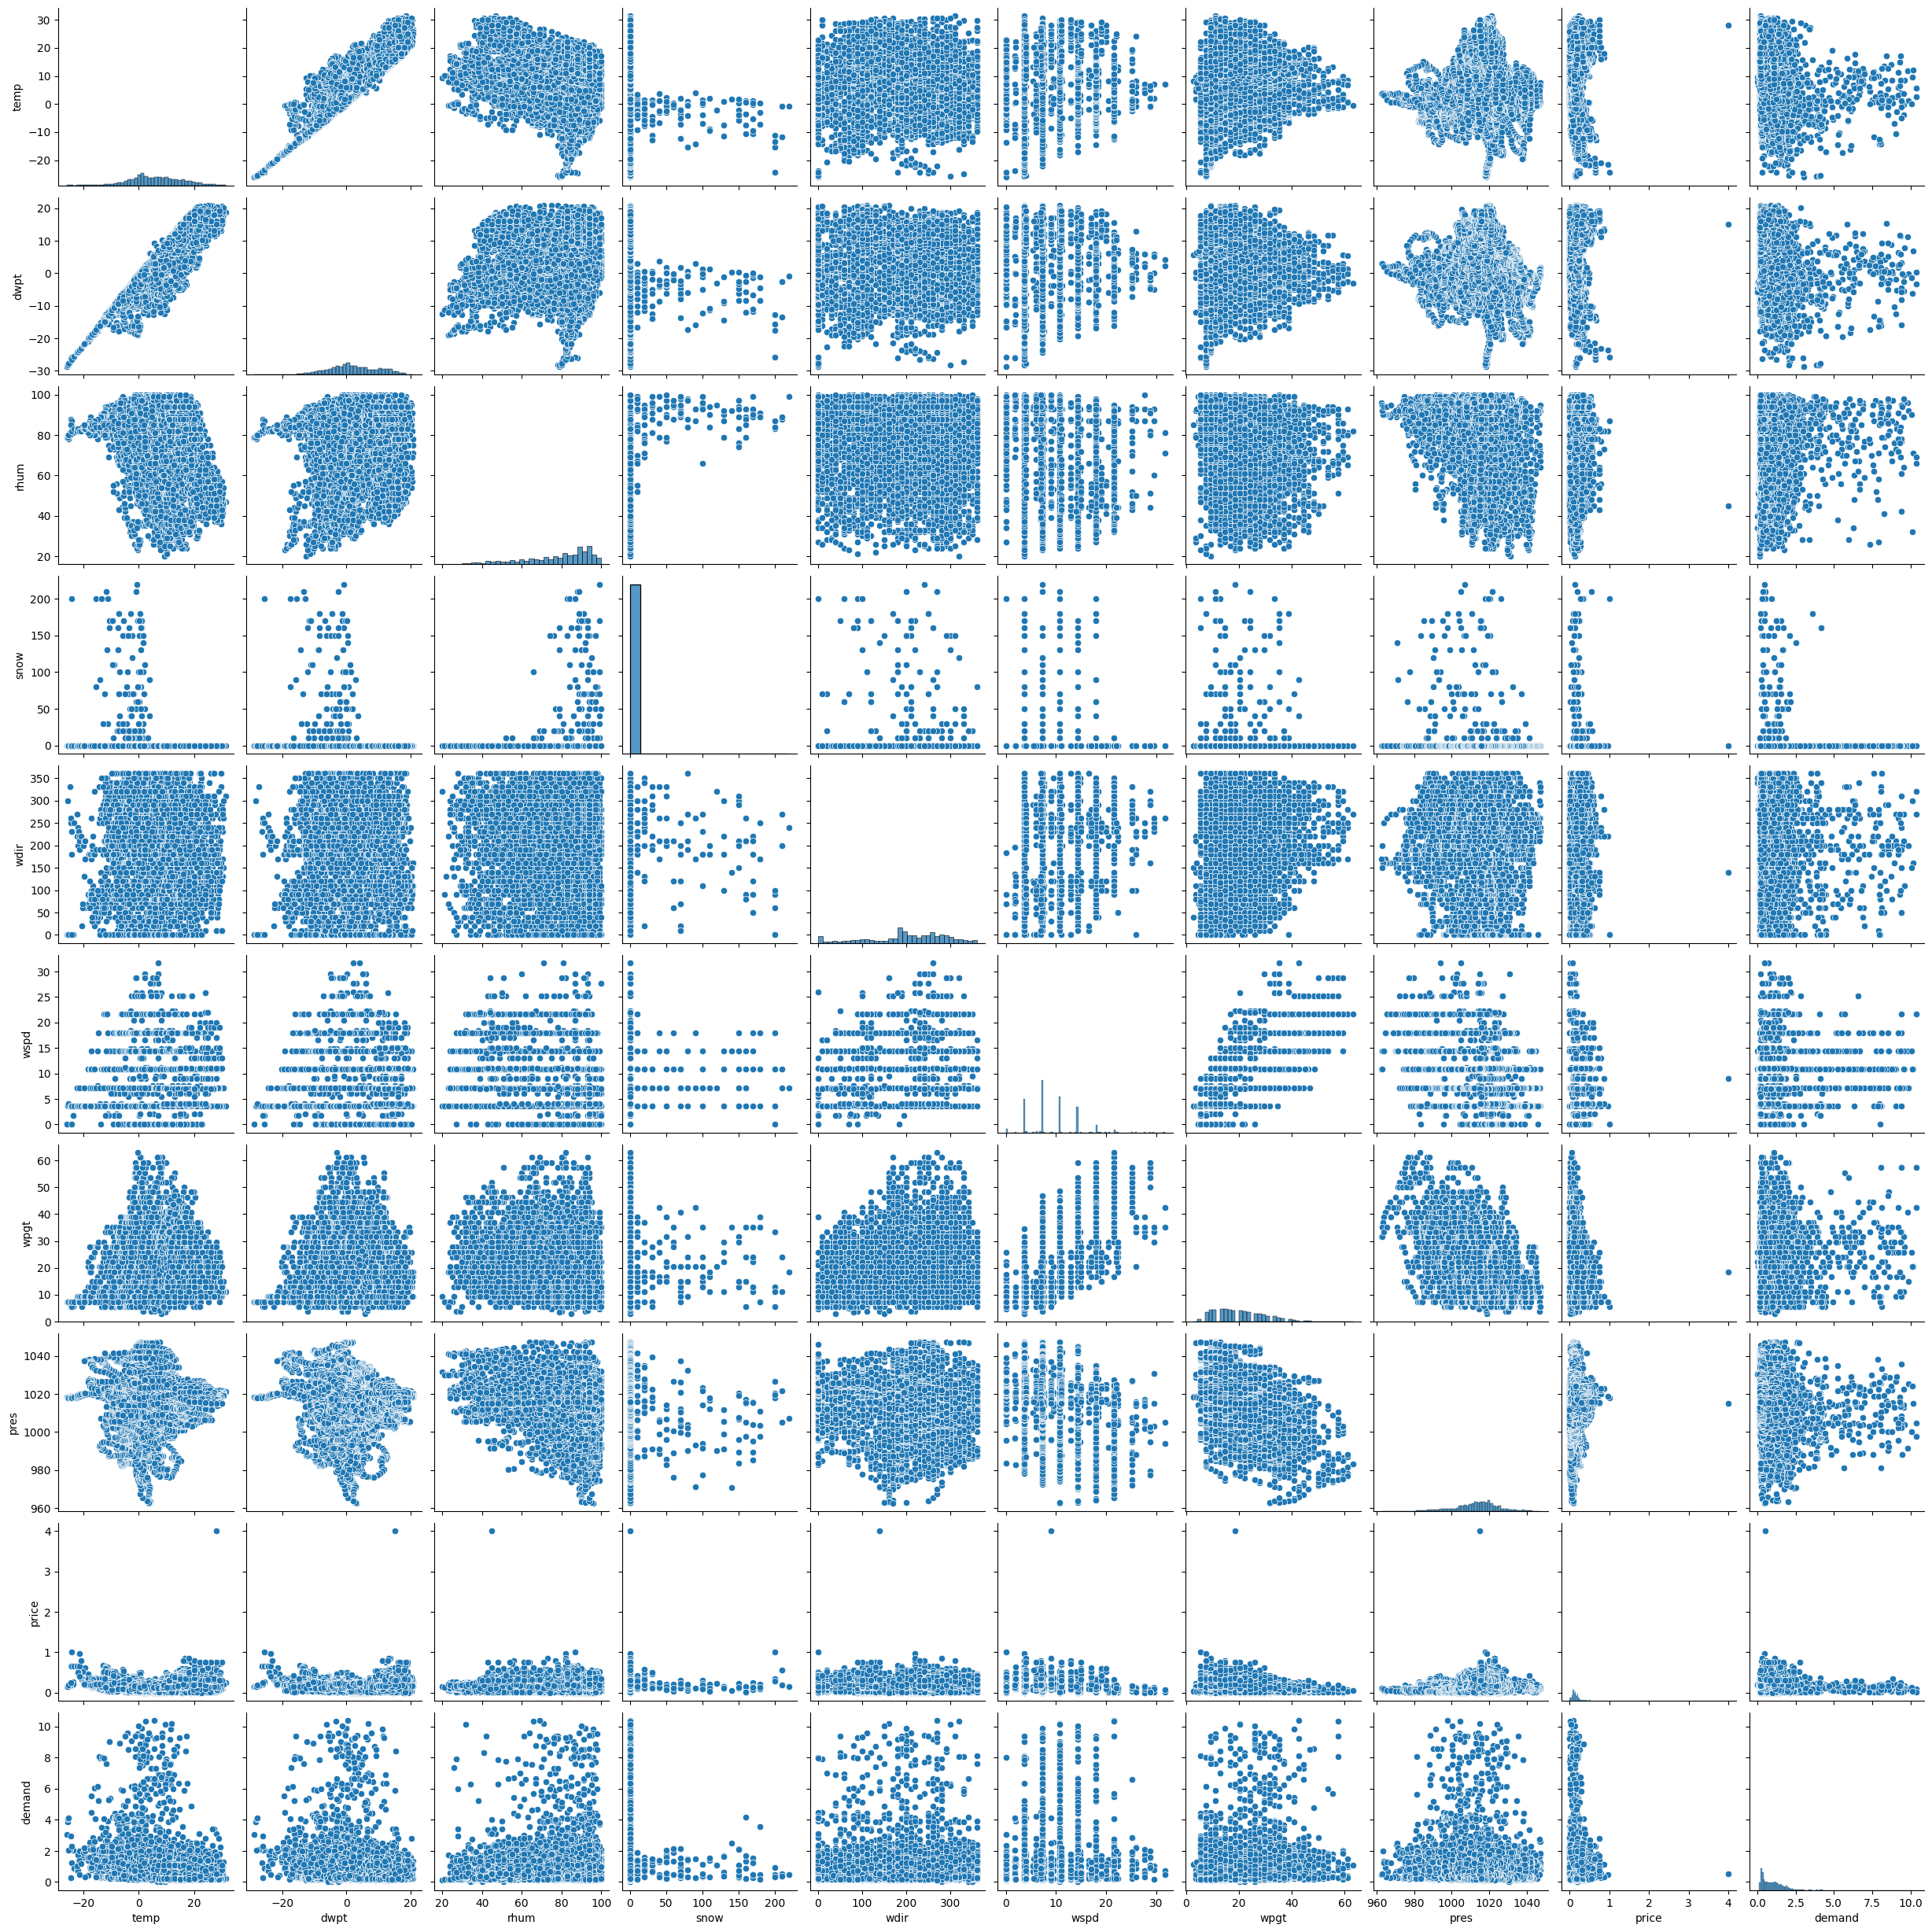

In [14]:
sns.pairplot(df)

<Axes: >

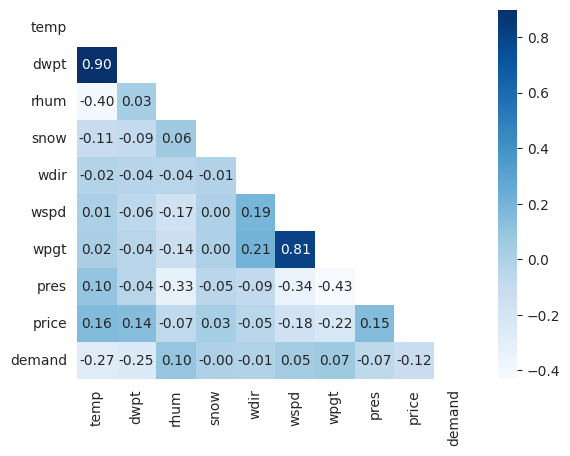

In [15]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style('white')

sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f')

## Analyse distributions of each variable (except demand)

In [16]:
df_before_transformations = df.copy()

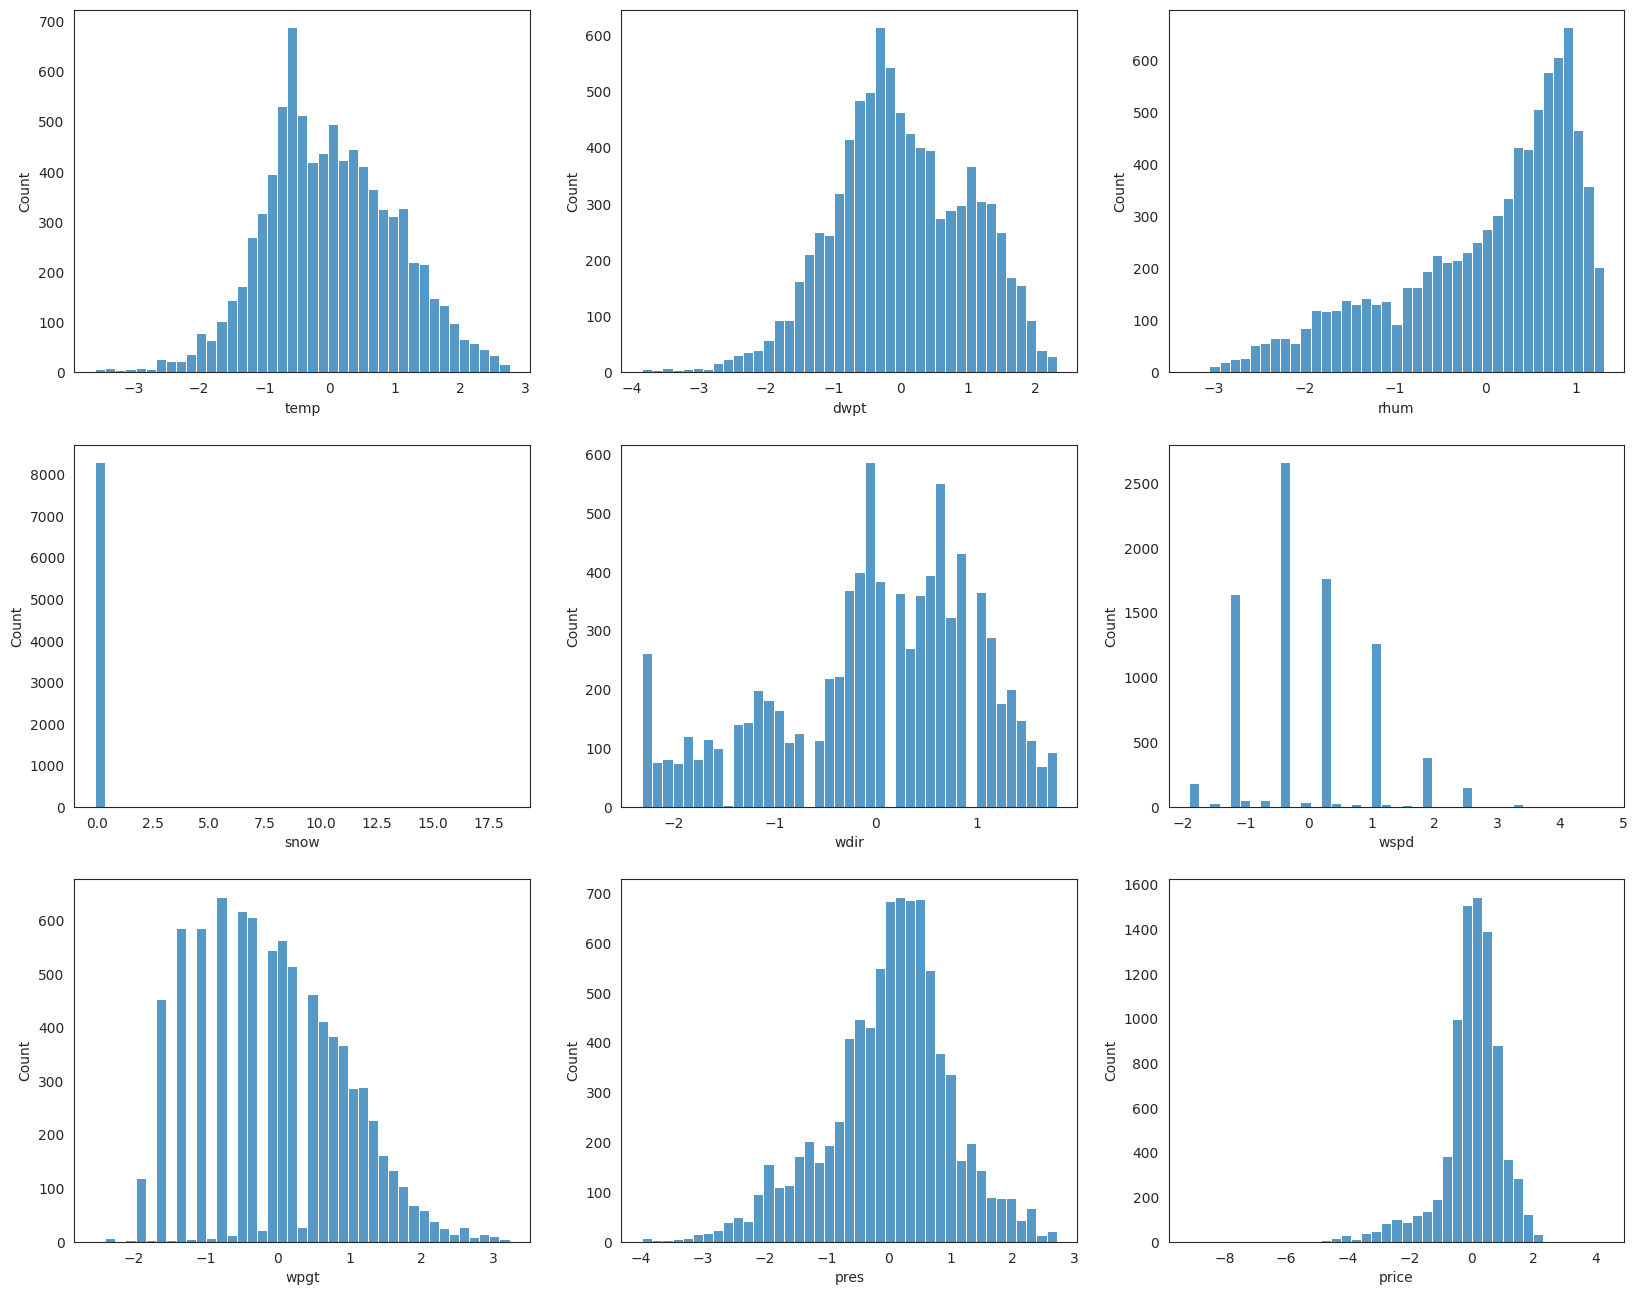

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for i in range(len(df.columns)-1):
    sns.histplot(df[df.columns[i]], ax=axes[int(np.floor(i/3))][int(i-np.floor(i/3)*3)], bins=41)

### Apply any relevant transformation

In [22]:
df = df_before_transformations.copy()
df.price = np.log(df.price)
df = df.apply(lambda x: (x - np.mean(x))/np.std(x))
df

,temp,dwpt,rhum,snow,wdir,wspd,wpgt,pres,price,demand
time,,,,,,,,,,
2021-08-31 21:00:00+00:00,0.525602,1.002342,0.961513,-0.09309,1.333322,-0.402005,-0.423038,-0.041603,-0.370066,-0.432755
2021-08-31 22:00:00+00:00,0.470442,0.915415,0.904310,-0.09309,1.333322,-0.402005,-0.792933,-0.041603,-0.338573,-0.417372
2021-08-31 23:00:00+00:00,0.382185,0.840907,0.961513,-0.09309,1.333322,-0.402005,-0.792933,-0.073116,-0.387292,-0.335032
2021-09-01 00:00:00+00:00,0.393217,0.766399,0.732702,-0.09309,1.447170,-0.402005,-0.792933,-0.096751,-0.408820,-0.035530
2021-09-01 01:00:00+00:00,0.282896,0.729144,0.961513,-0.09309,1.105624,-1.150726,-0.792933,-0.136143,-0.415424,-0.342271
...,...,...,...,...,...,...,...,...,...,...
2022-08-17 16:00:00+00:00,2.169387,1.722590,-1.326594,-0.09309,-0.943654,-0.443600,-0.792933,0.147478,2.222996,-0.143206
2022-08-17 17:00:00+00:00,1.948745,1.722590,-0.926176,-0.09309,-1.171352,-0.651579,-0.612984,0.147478,2.222947,1.575083
2022-08-17 18:00:00+00:00,1.948745,1.784680,-0.811770,-0.09309,-1.285201,-1.067535,-0.792933,0.186870,2.221036,-0.291600


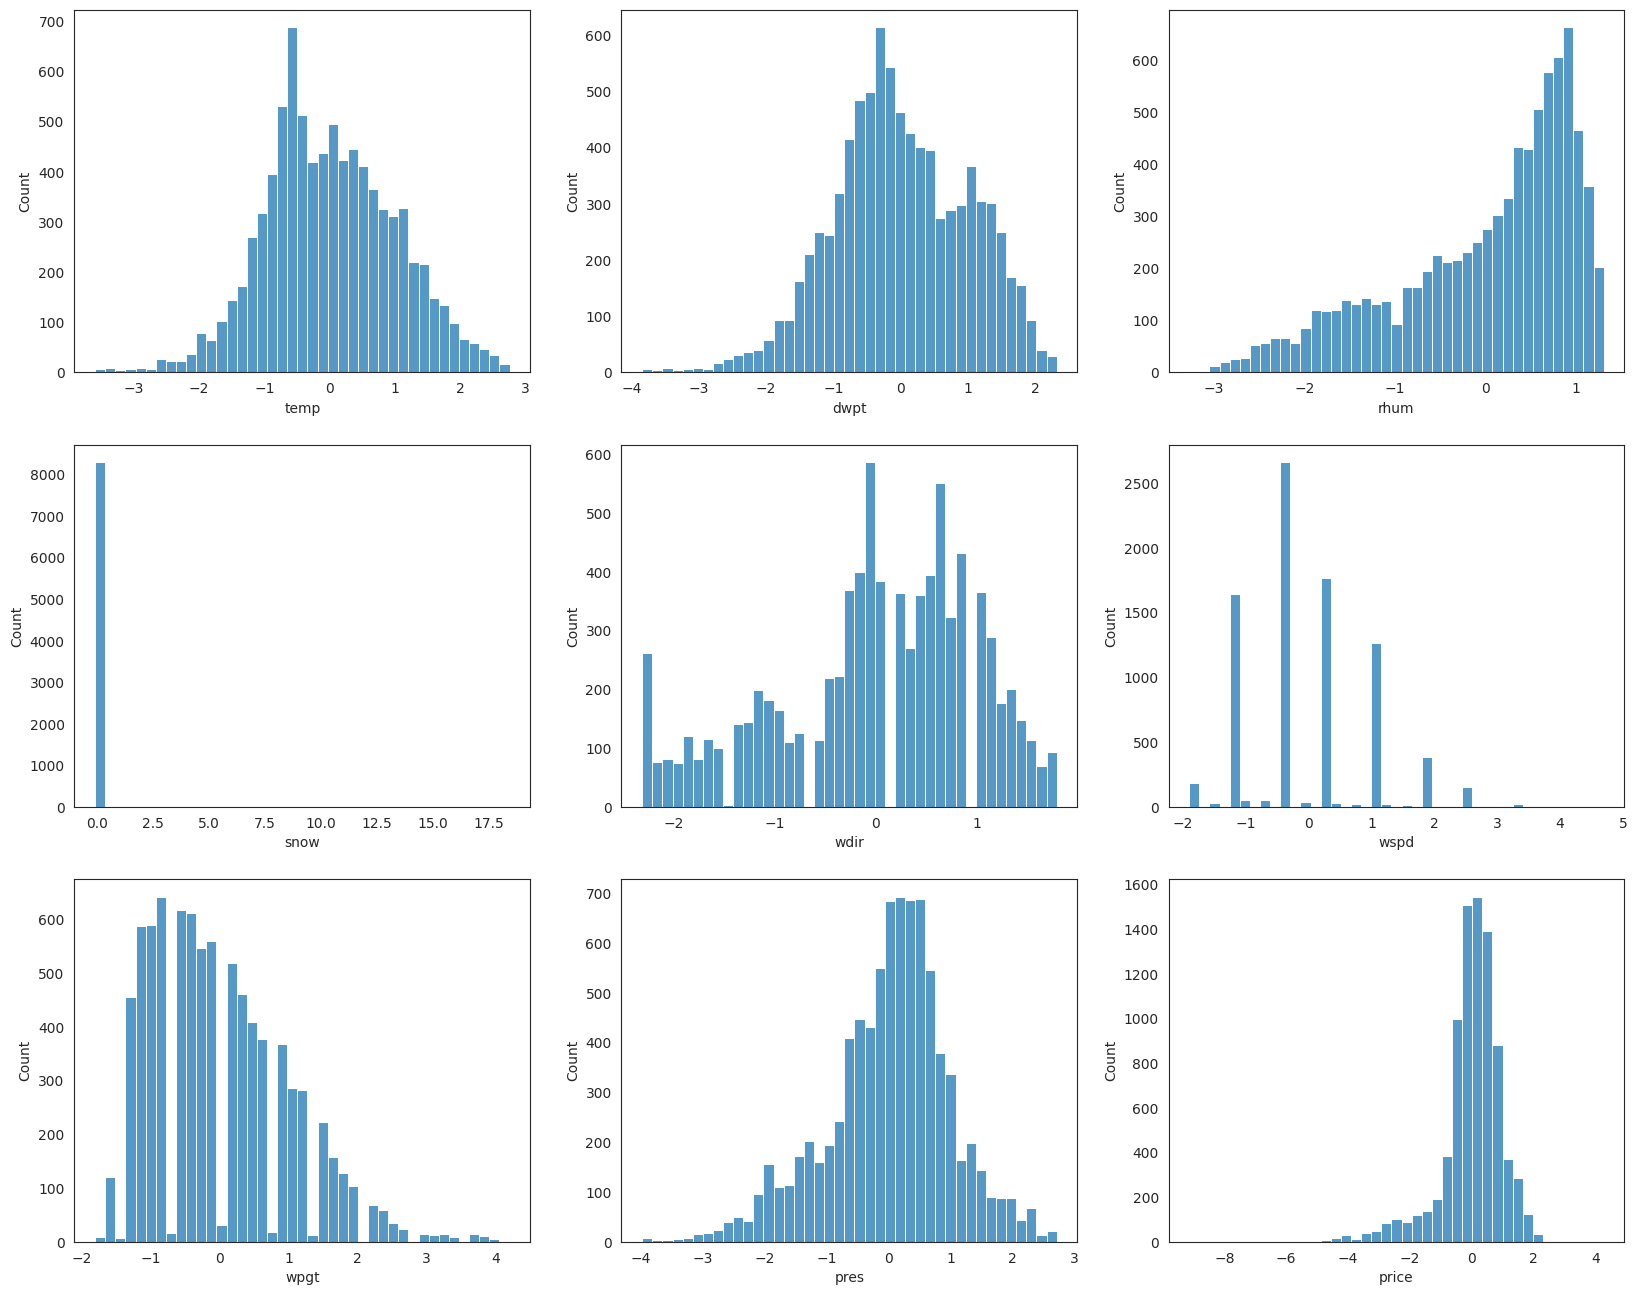

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))

for i in range(len(df.columns)-1):
    sns.histplot(df[df.columns[i]], ax=axes[int(np.floor(i/3))][int(i-np.floor(i/3)*3)], bins=41)

## Design one new feature (using only available features) and rank features by relevance

In [24]:
def is_weekend(dayofweek):
    if dayofweek > 5:
        return 1
    return 0

df['isweekend'] = df.index.dayofweek+1
df.isweekend = df.isweekend.apply(is_weekend)

<Axes: >

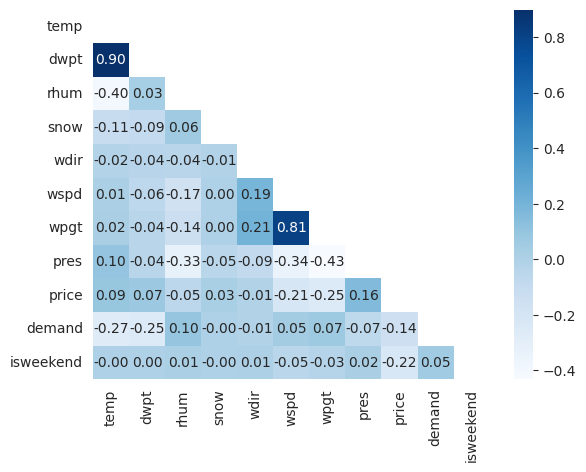

In [25]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set_style('white')

sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.2f')

The features ranking below is based on correlations between features and demand, and on correlations between the features themselves.

Most important features are:
1. temp
2. price
3. rhum

### Explain the rationale behind your ranking

dwpt, although it is strongly correlated with demand, is not as important because it's strongly correlated with temp, which I already included.

# Modelling

## Stationarizing the data

## Stationarizing the data

## ACF and PACF plots